In [2]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from shapely.geometry import Point, LineString, Polygon

Le but de ce notebook est, maintenant que nous avons choisi le modèle (Random Forest), de l'implémenter sur nos prédictions d'IFM pour prédire les feux en été sur la période 2023 - 2100.

In [4]:
X = pd.read_csv('X.csv')
Y = pd.read_csv('Y.csv')

X['maille_safran'] = X['maille_safran'].astype(str)
Y['Mailles'] = Y['Mailles'].astype(str)
Y.rename(columns={'Mailles': 'maille_safran', 'Année': 'Année'}, inplace=True)

X['maille_safran'] = X['maille_safran'].astype(int)
Y['maille_safran'] = Y['maille_safran'].astype(float).astype(int)

data = pd.merge(X, Y, on=['maille_safran', 'Année'], how='inner')

In [5]:
# Problèmes avec les données de 2021 qui n'était pas binaires
data.loc[data['Feu en été'] > 1, 'Feu en été'] = 1

In [6]:
Xt = data.drop(columns=['Feu en été', 'maille_safran', 'Année'])  
y = data['Feu en été']

In [7]:
# Initialiser et entraîner le meilleur modèle (Random Forest)
best_model = RandomForestClassifier() 
best_model.fit(Xt, y)

RandomForestClassifier()

In [8]:
# Charger les nouvelles données X à prédire
new_X = pd.read_csv('X_projection2100.csv')
X_pred = new_X.loc[new_X['Année']> 2022]
X_pred_ = X_pred.drop(columns=['maille_safran', 'Année']) 
X_pred_

,01 Jun,02 Jun,03 Jun,04 Jun,05 Jun,06 Jun,07 Jun,08 Jun,09 Jun,10 Jun,...,21 Aug,22 Aug,23 Aug,24 Aug,25 Aug,26 Aug,27 Aug,28 Aug,29 Aug,30 Aug
144,8.8,11.1,10.1,12.7,11.0,0.3,1.8,0.9,0.1,0.0,...,8.4,11.2,15.3,13.1,17.3,31.1,0.0,0.0,2.8,6.0
145,8.9,11.9,11.7,15.0,12.8,0.4,1.9,0.9,0.2,0.0,...,9.8,12.7,16.4,15.2,17.3,33.5,0.0,0.0,3.4,7.0
146,10.3,13.5,13.5,14.5,13.6,0.4,0.9,0.8,0.2,0.0,...,12.6,14.4,13.0,14.7,19.0,27.9,0.0,0.0,0.7,5.0
147,7.6,10.4,10.6,12.8,11.8,0.3,1.6,2.6,0.3,0.0,...,8.4,12.3,15.4,13.9,13.7,24.9,0.0,0.0,2.7,6.7
148,8.6,11.4,11.7,14.8,12.8,0.5,2.0,1.0,0.2,0.0,...,9.6,13.1,16.4,15.6,16.0,30.4,0.0,0.0,3.5,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11371,35.7,38.3,45.2,34.5,44.5,46.6,47.2,41.4,39.6,4.1,...,14.4,13.5,12.3,14.8,23.5,15.4,14.8,12.6,20.3,1.6
11372,33.5,35.6,42.4,31.9,40.9,43.8,44.4,39.4,37.8,4.2,...,11.7,11.9,10.9,13.6,20.5,13.6,13.3,11.7,17.8,0.5
11373,35.9,28.2,29.8,22.3,40.9,44.8,46.3,34.6,26.8,4.4,...,8.2,9.3,9.6,17.6,20.2,14.2,11.3,10.4,14.5,11.8
11374,42.0,31.8,32.1,29.5,47.0,44.6,40.9,41.8,28.2,4.6,...,9.2,13.3,11.1,17.0,19.4,13.7,14.4,12.8,15.5,13.9


In [9]:
# Prédire les y futurs à partir des nouvelles données X
predicted_y = best_model.predict(X_pred_)

# Afficher les prédictions
print("Prédictions des y futurs:", predicted_y)

Prédictions des y futurs: [1 0 0 ... 1 1 1]


In [10]:
# Transposer le vecteur en un vecteur colonne
predicted_y_colonne = predicted_y.reshape(-1, 1)

predicted_y_colonne
#len(predicted_y_colonne)

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [11]:
# Joindre le vecteur colonne à ton DataFrame X_predit
X_pred['Prédiction de feu en été'] = predicted_y_colonne

# Afficher le DataFrame avec les prédictions
X_pred

/tmp/ipykernel_493/1961226660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred['Prédiction de feu en été'] = predicted_y_colonne


,maille_safran,01 Jun,02 Jun,03 Jun,04 Jun,05 Jun,06 Jun,07 Jun,08 Jun,09 Jun,...,23 Aug,24 Aug,25 Aug,26 Aug,27 Aug,28 Aug,29 Aug,30 Aug,Année,Prédiction de feu en été
144,7741,8.8,11.1,10.1,12.7,11.0,0.3,1.8,0.9,0.1,...,15.3,13.1,17.3,31.1,0.0,0.0,2.8,6.0,2023,1
145,7742,8.9,11.9,11.7,15.0,12.8,0.4,1.9,0.9,0.2,...,16.4,15.2,17.3,33.5,0.0,0.0,3.4,7.0,2023,0
146,7743,10.3,13.5,13.5,14.5,13.6,0.4,0.9,0.8,0.2,...,13.0,14.7,19.0,27.9,0.0,0.0,0.7,5.0,2023,0
147,7823,7.6,10.4,10.6,12.8,11.8,0.3,1.6,2.6,0.3,...,15.4,13.9,13.7,24.9,0.0,0.0,2.7,6.7,2023,0
148,7824,8.6,11.4,11.7,14.8,12.8,0.5,2.0,1.0,0.2,...,16.4,15.6,16.0,30.4,0.0,0.0,3.5,7.2,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11371,8814,35.7,38.3,45.2,34.5,44.5,46.6,47.2,41.4,39.6,...,12.3,14.8,23.5,15.4,14.8,12.6,20.3,1.6,2100,1
11372,8815,33.5,35.6,42.4,31.9,40.9,43.8,44.4,39.4,37.8,...,10.9,13.6,20.5,13.6,13.3,11.7,17.8,0.5,2100,1
11373,8893,35.9,28.2,29.8,22.3,40.9,44.8,46.3,34.6,26.8,...,9.6,17.6,20.2,14.2,11.3,10.4,14.5,11.8,2100,1
11374,8894,42.0,31.8,32.1,29.5,47.0,44.6,40.9,41.8,28.2,...,11.1,17.0,19.4,13.7,14.4,12.8,15.5,13.9,2100,1


In [12]:
predictions = X_pred[['maille_safran', 'Année', 'Prédiction de feu en été']]
predictions

,maille_safran,Année,Prédiction de feu en été
144,7741,2023,1
145,7742,2023,0
146,7743,2023,0
147,7823,2023,0
148,7824,2023,1
...,...,...,...
11371,8814,2100,1
11372,8815,2100,1
11373,8893,2100,1
11374,8894,2100,1


In [13]:
predictions.to_csv('Y_projection2100.csv', index = False)

On va essayer de prédire non pas la présence de feu (1 ou 0) mais la probabilité qu'il y ai un feu (proba que ce soit 1)

In [14]:
# Charger les nouvelles données X à prédire
new_X = pd.read_csv('X_projection2100.csv')
X_pred = new_X.loc[new_X['Année']> 2022]
X_pred_proba = X_pred.drop(columns=['maille_safran', 'Année']) 
X_pred_proba

# Obtention des probabilités de prédiction
predicted_probabilities = best_model.predict_proba(X_pred_proba)
# Affichage des probabilités pour la classe 1 (feu)
print("Probabilités de feu en été:", predicted_probabilities)  #première colonne : proba de 0, deuxième : proba de 1

# Extraire uniquement les probabilités pour la classe 1 (feu)
predicted_y_proba = predicted_probabilities[:, 1]  # sélection de la deuxième colonne

# Affichage des probabilités pour la classe 1 (feu)
print("Probabilités de feu en été:", predicted_y_proba)
print("Longueur de predicted_y_proba:", len(predicted_y_proba))

Probabilités de feu en été: [[0.47       0.53      ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 ...
 [0.44033333 0.55966667]
 [0.42866667 0.57133333]
 [0.382      0.618     ]]
Probabilités de feu en été: [0.53       0.5        0.5        ... 0.55966667 0.57133333 0.618     ]
Longueur de predicted_y_proba: 11232


In [15]:
# Joindre le vecteur colonne à ton DataFrame X_predit
X_pred['Proba de feu en été'] = predicted_y_proba

# Afficher le DataFrame avec les prédictions
X_pred

/tmp/ipykernel_493/3515256972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred['Proba de feu en été'] = predicted_y_proba


,maille_safran,01 Jun,02 Jun,03 Jun,04 Jun,05 Jun,06 Jun,07 Jun,08 Jun,09 Jun,...,23 Aug,24 Aug,25 Aug,26 Aug,27 Aug,28 Aug,29 Aug,30 Aug,Année,Proba de feu en été
144,7741,8.8,11.1,10.1,12.7,11.0,0.3,1.8,0.9,0.1,...,15.3,13.1,17.3,31.1,0.0,0.0,2.8,6.0,2023,0.530000
145,7742,8.9,11.9,11.7,15.0,12.8,0.4,1.9,0.9,0.2,...,16.4,15.2,17.3,33.5,0.0,0.0,3.4,7.0,2023,0.500000
146,7743,10.3,13.5,13.5,14.5,13.6,0.4,0.9,0.8,0.2,...,13.0,14.7,19.0,27.9,0.0,0.0,0.7,5.0,2023,0.500000
147,7823,7.6,10.4,10.6,12.8,11.8,0.3,1.6,2.6,0.3,...,15.4,13.9,13.7,24.9,0.0,0.0,2.7,6.7,2023,0.430000
148,7824,8.6,11.4,11.7,14.8,12.8,0.5,2.0,1.0,0.2,...,16.4,15.6,16.0,30.4,0.0,0.0,3.5,7.2,2023,0.520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11371,8814,35.7,38.3,45.2,34.5,44.5,46.6,47.2,41.4,39.6,...,12.3,14.8,23.5,15.4,14.8,12.6,20.3,1.6,2100,0.538000
11372,8815,33.5,35.6,42.4,31.9,40.9,43.8,44.4,39.4,37.8,...,10.9,13.6,20.5,13.6,13.3,11.7,17.8,0.5,2100,0.558000
11373,8893,35.9,28.2,29.8,22.3,40.9,44.8,46.3,34.6,26.8,...,9.6,17.6,20.2,14.2,11.3,10.4,14.5,11.8,2100,0.559667
11374,8894,42.0,31.8,32.1,29.5,47.0,44.6,40.9,41.8,28.2,...,11.1,17.0,19.4,13.7,14.4,12.8,15.5,13.9,2100,0.571333


In [16]:
probas = X_pred[['maille_safran', 'Année', 'Proba de feu en été']]
probas

,maille_safran,Année,Proba de feu en été
144,7741,2023,0.530000
145,7742,2023,0.500000
146,7743,2023,0.500000
147,7823,2023,0.430000
148,7824,2023,0.520000
...,...,...,...
11371,8814,2100,0.538000
11372,8815,2100,0.558000
11373,8893,2100,0.559667
11374,8894,2100,0.571333


In [17]:
probas.to_csv('Y_projection2100_probas.csv', index = False)

# Carte des mailles les plus touchées par les feux entre 2023 et 2100

In [18]:
predictions[predictions['maille_safran']==7741]

,maille_safran,Année,Prédiction de feu en été
144,7741,2023,1
288,7741,2024,0
432,7741,2025,1
576,7741,2026,1
720,7741,2027,0
...,...,...,...
10656,7741,2096,1
10800,7741,2097,1
10944,7741,2098,0
11088,7741,2099,1


In [19]:
df_sum = predictions.groupby(['maille_safran'])['Prédiction de feu en été'].sum()


In [20]:
df_sum

maille_safran
7741    48
7742    50
7743    45
7823    53
7824    51
        ..
8814    46
8815    36
8893    38
8894    35
8896    44
Name: Prédiction de feu en été, Length: 144, dtype: int64

In [21]:
df_final = pd.DataFrame()
df_final['nb de feux']=df_sum

In [22]:
df_final

,nb de feux
maille_safran,
7741,48
7742,50
7743,45
7823,53
7824,51
...,...
8814,46
8815,36
8893,38


In [23]:
import matplotlib.pyplot as plt

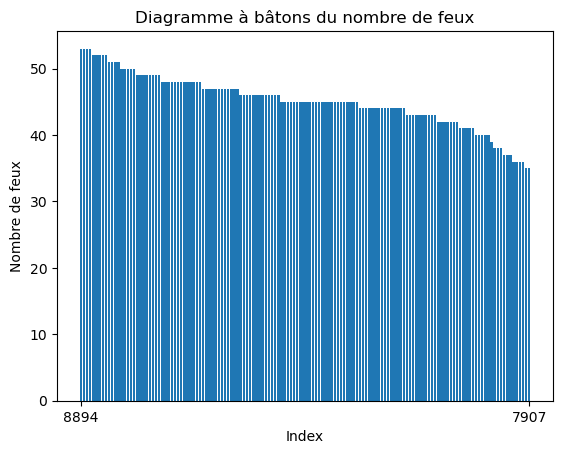

In [24]:
df_final = df_final.sort_values(by='nb de feux', ascending = False)

# Obtenir l'index de la valeur maximale et minimale
max_index = df_final['nb de feux'].idxmax()
min_index = df_final['nb de feux'].idxmin()

# Créer le diagramme à bâtons
plt.bar(range(len(df_final)), df_final['nb de feux'])

# Définir les étiquettes d'abscisse pour les valeurs maximale et minimale uniquement
plt.xticks([0, len(df_final)-1], [min_index, max_index])

# Ajouter des labels et un titre
plt.xlabel('Index')
plt.ylabel('Nombre de feux')
plt.title('Diagramme à bâtons du nombre de feux')

# Afficher le diagramme
plt.show()

In [28]:
df_final.to_csv('df_final.csv')

# Cartes des mailles les plus touchées par les feux par année

*On reprends le code qui trace les mailles SAFRAN sur la shapeline des communes*

In [29]:
data_safran = 'mailles_landes_etendues.csv'
df_safran = pd.read_csv(data_safran)
#print(df_safran.head())

# Créer les Points directement lors de la création du GeoDataFrame
geo_df_safran = gpd.GeoDataFrame(
    df_safran, 
    geometry=gpd.points_from_xy(df_safran.longitude, df_safran.latitude),
    crs='EPSG:4326'  # Définir le CRS initial lors de la création
)

# Reprojection en Lambert 93 pour les calculs métriques
geo_df_safran = geo_df_safran.to_crs(epsg=2154)

# Fonction pour créer un polygone de maille à partir d'un point (coin inférieur gauche)
def create_square(point, size=8000):  # 8 km
    return Polygon([
        (point.x, point.y),
        (point.x + size, point.y),
        (point.x + size, point.y + size),
        (point.x, point.y + size),
        (point.x, point.y)  # Fermeture du polygone
    ])

# Création des polygones de maille SAFRAN
geo_df_safran['geometry'] = geo_df_safran['geometry'].apply(create_square)

# Reprojection des polygones en coordonnées géographiques pour visualisation
mailles_polygons = geo_df_safran.to_crs(epsg=4326)

# Affichage des premières lignes pour vérifier
#print(mailles_polygons.head())


In [31]:
!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 6.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 60.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.1/412.1 kB 18.7 MB/s eta 0:00:00
  Cloning https://github.com/inseefrlab/cartiflette (to revision 80b8a5a28371feb6df31d55bcc2617948a5f9b1a) to /tmp/pip-req-build-gjoz4rm_
  Running command git clone --filter=blob:none --quiet https://github.com/inseefrlab/cartiflette /tmp/pip-req-build-gjoz4rm_
  Running command git rev-parse -q --verify 'sha^80b8a5a28371feb6df31d55bcc2617948a5f9b1a'


In [32]:
import cartiflette.s3 as s3

In [33]:
communes_landes = s3.download_vectorfile_url_all(
    values="40",  # Code département des Landes
    crs=4326,  
    borders="COMMUNE",  
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",  
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022
)

# Calcul de l'aire des communes en mètre carré (projection en Lambert-93)
communes_landes["area"] = communes_landes.to_crs(2154).area

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE/crs=4326/DEPARTEMENT=40/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.12MiB [00:00, 34.2MiB/s]
ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


/tmp/ipykernel_493/1195740052.py:4: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


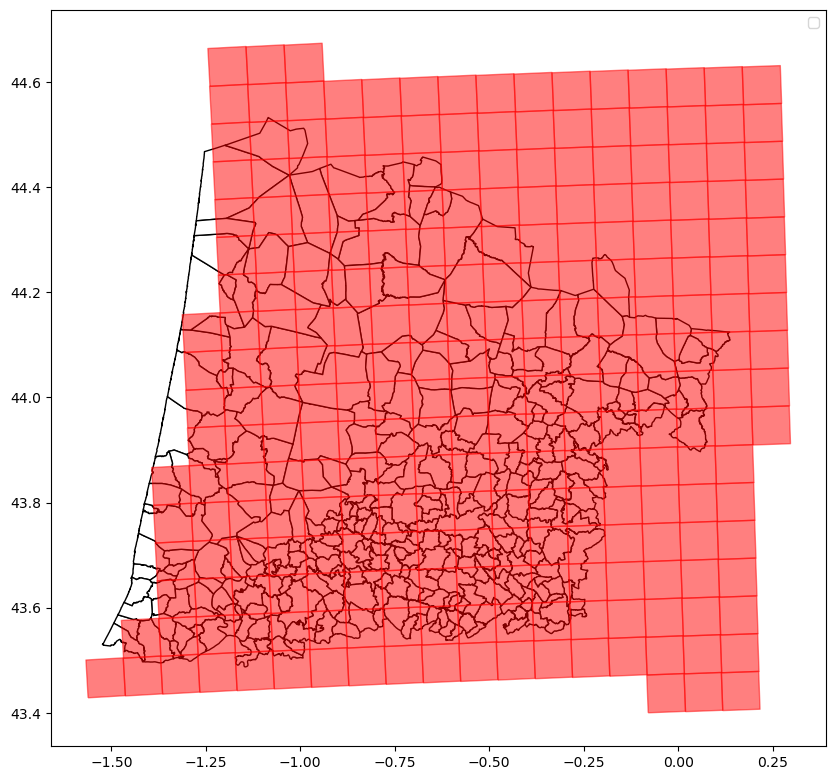

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
communes_landes.to_crs(epsg = 4326).plot(ax=ax, color='white', edgecolor='black', label='Communes')
mailles_polygons.plot(ax=ax, color='red', alpha=0.5, edgecolor='red', label='Mailles Safran')
plt.legend()
plt.show()

*Tracé par année, par exemple l'année 2023*

In [35]:
df_probas = pd.read_csv('Y_projection2100_probas.csv')
print(df_probas.head())

   maille_safran  Année  Proba de feu en été
0           7741   2023                 0.53
1           7742   2023                 0.50
2           7743   2023                 0.50
3           7823   2023                 0.43
4           7824   2023                 0.52


/tmp/ipykernel_493/2186446063.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_probas_2023['maille_safran'] = df_probas_2023['maille_safran'].astype(int)
/tmp/ipykernel_493/2186446063.py:32: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


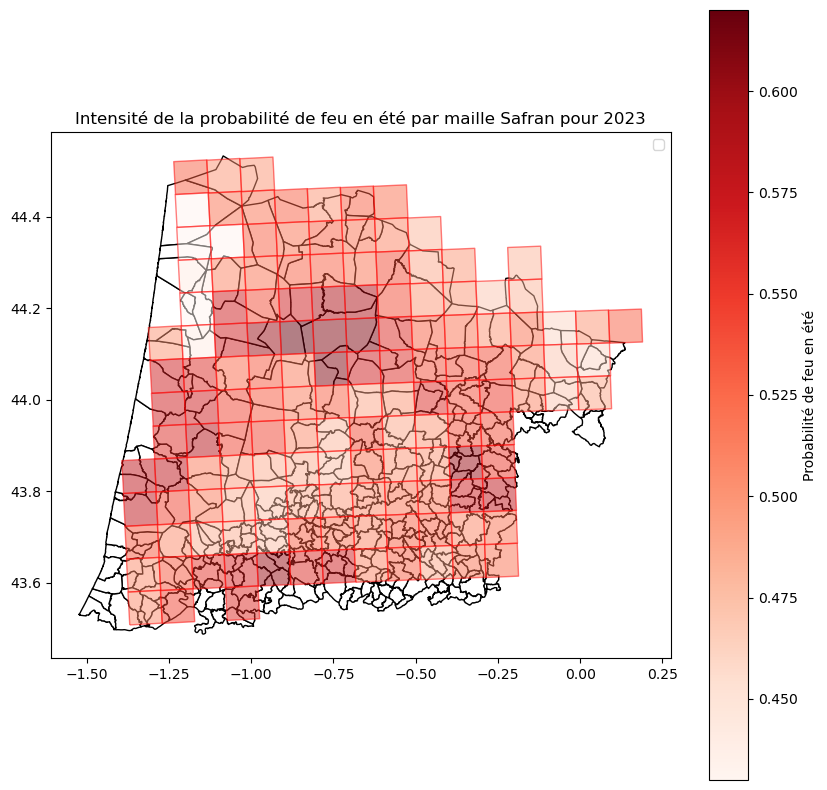

In [36]:
from matplotlib.cm import Reds

# Filtrer les données pour l'année 2023
df_probas_2023 = df_probas[df_probas['Année'] == 2023]

# Assurer que l'identifiant de maille est du même type que dans les polygones
df_probas_2023['maille_safran'] = df_probas_2023['maille_safran'].astype(int)
mailles_polygons['maille_safran'] = mailles_polygons['maille_safran'].astype(int)

# Fusionner les probabilités avec les polygones
mailles_polygons = mailles_polygons.merge(df_probas_2023, on='maille_safran')

# Configuration de la couleur en fonction de la probabilité de feu
norm = Normalize(vmin=mailles_polygons['Proba de feu en été'].min(), vmax=mailles_polygons['Proba de feu en été'].max())
cmap = Reds

fig, ax = plt.subplots(figsize=(10, 10))
# Tracer les communes
communes_landes.to_crs(epsg=4326).plot(ax=ax, color='white', edgecolor='black', label='Communes')

# Tracer les polygones avec une intensité de rouge variant avec la probabilité de feu
mailles_polygons.plot(ax=ax, column='Proba de feu en été', cmap=cmap, norm=norm, edgecolor='red', alpha=0.5, label='Mailles Safran')

# Ajouter une légende pour la probabilité de feu
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Créer un tableau de données fictif pour la légende
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Probabilité de feu en été')

# Ajouter les titres et légendes
plt.title('Intensité de la probabilité de feu en été par maille Safran pour 2023')
plt.legend()
plt.show()


# Carte du nombre de feux prévu par maille entre 2023 et 2100

In [37]:
df_final = pd.read_csv('df_final.csv')

In [38]:
merged_df = mailles_polygons.merge(df_final, on='maille_safran')
alpha_values = (merged_df['nb de feux'] - merged_df['nb de feux'].min()) / (merged_df['nb de feux'].max() - merged_df['nb de feux'].min())


/tmp/ipykernel_493/4185781973.py:10: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


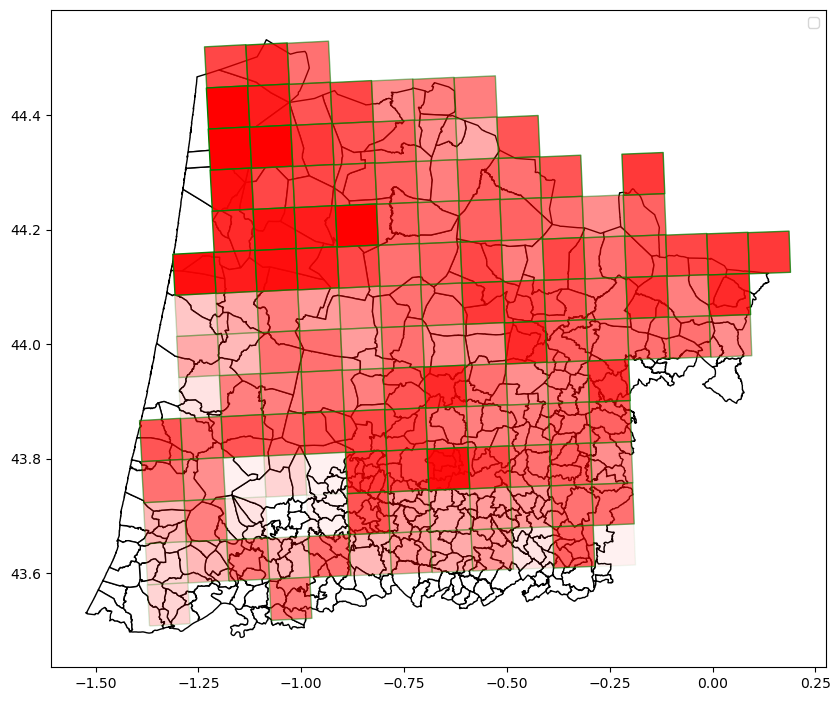

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))

# Tracer les communes
communes_landes.to_crs(epsg=4326).plot(ax=ax, color='white', edgecolor='black', label='Communes')

# Tracer les mailles avec alpha dépendant de 'nb de feux'
merged_df.plot(ax=ax, color='red', alpha=alpha_values, edgecolor='green', label='Mailles Safran')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()